In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
import xgboost as xgb

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

import matplotlib.style as style
from xgboost import plot_tree

from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from IPython.display import Audio
sound_file = '/Users/rogerrabbit/Library/Application Support/Google/Chrome/Default/Extensions/lojgmehidjdhhbmpjfamhpkpodfcodef/34_0/audio/0f034826.mp3'

# Fonction

In [2]:

def FilterOne(d, x):
    d1 = d.isnull().sum() / x * 100
    d2 = pd.DataFrame(data=d1)
    d3 = d2.rename(columns={0: 'RatioEmpty'})
    d4 = d3.T
    d = d.append(d4, ignore_index=True)
    d5 = d.T
    d6 = d5.rename(columns={x: 'EmptyRatio'})
    d7 = d6.drop(d6[d6.EmptyRatio > 50].index)
    d8 = d7.T
    d9 = d8[:-1]
    return d9


def mEmptyCell(data):
    all_empty_cell = round((sum(data.isnull().sum())) * 100 / (len(data) * len(data.columns)))
    return all_empty_cell

def variableCount(x):
    item_c = data03[x].value_counts()
    item_c_df = pd.DataFrame(item_c)
    d6 = item_c_df.rename(columns={x: 'Count'})
    d6[x] = d6.index
    ax = sns.barplot(x=x, y="Count", data=d6, ci=68)
    return d6


# Mise en forme et nettoyage

In [3]:
#Fonction 

d_15 = pd.read_csv('2015.csv')
d_16 = pd.read_csv('2016.csv')

d_15_f1 = FilterOne(d_15, 3340)
d_16_f1 = FilterOne(d_16, 3376)

df1 = d_15_f1["Location"].str.split(":", n=10, expand=True)
for x in range(8):
    d_15_f1[x] = df1[x]

df1 = d_15_f1[1].str.split(",", n=2, expand=True)
df1_r = df1[0].str.replace("'", '')
d_15_f1['Latitude'] = df1_r

df2 = d_15_f1[2].str.split(",", n=2, expand=True)
df2_r = df2[0].str.replace("'", '')
d_15_f1['Longitude'] = df2_r

df3 = d_15_f1[4].str.split(",", n=2, expand=True)
df3_r = df3[0].str.replace('"', '')
d_15_f1['Address'] = df3_r

df4 = d_15_f1[5].str.split(',', n=1, expand=True)
df4_r = df4[0].str.replace('"', '')
d_15_f1['City'] = df4_r

df5 = d_15_f1[6].str.split(",", n=1, expand=True)
df5_r = df5[0].str.replace('"', '')
d_15_f1['State'] = df5_r

df6 = d_15_f1[7].str.split("}", n=1, expand=True)
df6_r = df6[0].str.replace('"', '')
d_15_f1['ZipCode'] = df6_r

d_15_f1.drop(1, inplace=True, axis=1)
d_15_f1.drop(2, inplace=True, axis=1)
d_15_f1.drop(3, inplace=True, axis=1)
d_15_f1.drop(4, inplace=True, axis=1)
d_15_f1.drop(5, inplace=True, axis=1)
d_15_f1.drop(6, inplace=True, axis=1)
d_15_f1.drop(7, inplace=True, axis=1)
d_15_f1.drop('Location', inplace=True, axis=1)

d1 = d_15_f1["OSEBuildingID"]
d2 = d_16_f1["OSEBuildingID"]
d11 = pd.DataFrame(d1)
d21 = pd.DataFrame(d2)
d_2015 = d11.merge(d21, on='OSEBuildingID', how='outer', suffixes=['', '_'], indicator=True)
d_2015_1 = d_2015.loc[d_2015['_merge'] != 'both']
d_2015_2 = d_2015_1.loc[d_2015['_merge'] != 'right_only']

d_2015_3 = pd.merge(d_15_f1, d_2015_2, on=["OSEBuildingID", "OSEBuildingID"])

data = d_2015_3.append(d_16_f1)
data01 = data.sort_values(by=['OSEBuildingID'], ascending=True)
data02 = data01.reset_index()
#data02.drop('index', ad=True, axis=1)
data02.drop('_merge', inplace=True, axis=1)
data02.drop(0, inplace=True, axis=1)
data02.replace(0, np.nan, inplace=True)
data03 = FilterOne(data02, 3432)

data03_ = data03["ListOfAllPropertyUseTypes"].str.split(",", n=1, expand=True)
data03['ListOfAllPropertyUseTypes'] = data03_[0]
data03.drop('ListOfAllPropertyUseTypes', inplace=True, axis=1)
data03.drop('LargestPropertyUseType', inplace=True, axis=1)

data03.drop('OSEBuildingID', inplace=True, axis=1)
data03.drop('DataYear', inplace=True, axis=1)
data03.drop('BuildingType', inplace=True, axis=1)
data03.drop('PropertyName', inplace=True, axis=1)
data03.drop('TaxParcelIdentificationNumber', inplace=True, axis=1)
data03.drop('Neighborhood', inplace=True, axis=1)
data03.drop('NumberofBuildings', inplace=True, axis=1)
data03.drop('City', inplace=True, axis=1)
data03.drop('Address', inplace=True, axis=1)
data03.drop('State', inplace=True, axis=1)
data03.drop('PrimaryPropertyType', inplace=True, axis=1)
data03.drop('GHGEmissionsIntensity', inplace=True, axis=1)
data03.drop('ComplianceStatus', inplace=True, axis=1)
data03.drop('CouncilDistrictCode', inplace=True, axis=1)
data_04 = data03.dropna()

import time
import matplotlib
from tqdm import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize': (15, 15)})
for i in tqdm(range(5)):
    time.sleep(1)


def FilterOne(d, x):
    d1 = d.isnull().sum() / x * 100
    d2 = pd.DataFrame(data=d1)
    d3 = d2.rename(columns={0: 'RatioEmpty'})
    d4 = d3.T
    d = d.append(d4, ignore_index=True)
    d5 = d.T
    d6 = d5.rename(columns={x: 'EmptyRatio'})
    d7 = d6.drop(d6[d6.EmptyRatio > 50].index)
    d8 = d7.T
    d9 = d8[:-1]
    return d9


def mEmptyCell(data):
    all_empty_cell = round((sum(data.isnull().sum())) * 100 / (len(data) * len(data.columns)))
    return all_empty_cell


d_15 = pd.read_csv('2015.csv')
d_16 = pd.read_csv('2016.csv')

d_15_f1 = FilterOne(d_15, 3340)
d_16_f1 = FilterOne(d_16, 3376)

df1 = d_15_f1["Location"].str.split(":", n=10, expand=True)
for x in range(8):
    d_15_f1[x] = df1[x]

df1 = d_15_f1[1].str.split(",", n=2, expand=True)
df1_r = df1[0].str.replace("'", '')
d_15_f1['Latitude'] = df1_r

df2 = d_15_f1[2].str.split(",", n=2, expand=True)
df2_r = df2[0].str.replace("'", '')
d_15_f1['Longitude'] = df2_r

df3 = d_15_f1[4].str.split(",", n=2, expand=True)
df3_r = df3[0].str.replace('"', '')
d_15_f1['Address'] = df3_r

df4 = d_15_f1[5].str.split(',', n=1, expand=True)
df4_r = df4[0].str.replace('"', '')
d_15_f1['City'] = df4_r

df5 = d_15_f1[6].str.split(",", n=1, expand=True)
df5_r = df5[0].str.replace('"', '')
d_15_f1['State'] = df5_r

df6 = d_15_f1[7].str.split("}", n=1, expand=True)
df6_r = df6[0].str.replace('"', '')
d_15_f1['ZipCode'] = df6_r

d_15_f1.drop(1, inplace=True, axis=1)
d_15_f1.drop(2, inplace=True, axis=1)
d_15_f1.drop(3, inplace=True, axis=1)
d_15_f1.drop(4, inplace=True, axis=1)
d_15_f1.drop(5, inplace=True, axis=1)
d_15_f1.drop(6, inplace=True, axis=1)
d_15_f1.drop(7, inplace=True, axis=1)
d_15_f1.drop('Location', inplace=True, axis=1)

d1 = d_15_f1["OSEBuildingID"]
d2 = d_16_f1["OSEBuildingID"]
d11 = pd.DataFrame(d1)
d21 = pd.DataFrame(d2)
d_2015 = d11.merge(d21, on='OSEBuildingID', how='outer', suffixes=['', '_'], indicator=True)
d_2015_1 = d_2015.loc[d_2015['_merge'] != 'both']
d_2015_2 = d_2015_1.loc[d_2015['_merge'] != 'right_only']

d_2015_3 = pd.merge(d_15_f1, d_2015_2, on=["OSEBuildingID", "OSEBuildingID"])

data = d_2015_3.append(d_16_f1)
data01 = data.sort_values(by=['OSEBuildingID'], ascending=True)
data02 = data01.reset_index()
data02.drop('index', inplace=True, axis=1)
data02.drop('_merge', inplace=True, axis=1)
data02.drop(0, inplace=True, axis=1)
data02.replace(0, np.nan, inplace=True)
data03 = FilterOne(data02, 3432)

#On garde les variables Fixes


data03_ = data03["ListOfAllPropertyUseTypes"].str.split(",", n=1, expand=True)

data03.drop('OSEBuildingID', inplace=True, axis=1)
data03.drop('PropertyName', inplace=True, axis=1)
data03.drop('TaxParcelIdentificationNumber', inplace=True, axis=1)
data03.drop('CouncilDistrictCode', inplace=True, axis=1)
data03.drop('DataYear', inplace=True, axis=1)
data03.drop('NumberofBuildings', inplace=True, axis=1)
data03.drop('City', inplace=True, axis=1)
data03.drop('Address', inplace=True, axis=1)
data03.drop('State', inplace=True, axis=1)
data03.drop('GHGEmissionsIntensity', inplace=True, axis=1)
data03.drop('ComplianceStatus', inplace=True, axis=1)
data03.drop('SiteEUI(kBtu/sf)', inplace=True, axis=1)
data03.drop('SiteEUIWN(kBtu/sf)', inplace=True, axis=1)
data03.drop('SourceEUI(kBtu/sf)', inplace=True, axis=1)
data03.drop('SourceEUIWN(kBtu/sf)', inplace=True, axis=1)
data03.drop('SiteEnergyUse(kBtu)', inplace=True, axis=1)
data03.drop('SiteEnergyUseWN(kBtu)', inplace=True, axis=1)
data03.drop('Electricity(kWh)', inplace=True, axis=1)
data03.drop('NaturalGas(therms)', inplace=True, axis=1)
data03.drop('ZipCode', inplace=True, axis=1)
data03.drop('Electricity(kBtu)', inplace=True, axis=1)
data03.drop('NaturalGas(kBtu)', inplace=True, axis=1)
data03

100%|██████████| 5/5 [00:05<00:00,  1.00s/it]


,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,Latitude,Longitude,TotalGHGEmissions
0,NonResidential,Hotel,DOWNTOWN,1927,12,88434,88434,Hotel,Hotel,88434,60,47.6122,-122.338,249.98
1,NonResidential,Hotel,DOWNTOWN,1996,11,103566,88502,"Hotel, Parking, Restaurant",Hotel,83880,61,47.6132,-122.334,295.86
2,NonResidential,Hotel,DOWNTOWN,1969,41,956110,759392,Hotel,Hotel,756493,43,47.6139,-122.338,2089.28
3,NonResidential,Hotel,DOWNTOWN,1926,10,61320,61320,Hotel,Hotel,61320,56,47.6141,-122.337,286.43
4,NonResidential,Hotel,DOWNTOWN,1980,18,175580,113580,"Hotel, Parking, Swimming Pool",Hotel,123445,75,47.6138,-122.34,505.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,Nonresidential COS,Office,GREATER DUWAMISH,1990,1,12294,12294,Office,Office,12294,46,47.5672,-122.312,20.94
3428,Nonresidential COS,Other,DOWNTOWN,2004,1,16000,16000,Other - Recreation,Other - Recreation,16000,NaN,47.5962,-122.323,32.17
3429,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE,1974,1,13157,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583,NaN,47.6364,-122.358,223.54
3430,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH,1989,1,14101,14101,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,6601,NaN,47.5283,-122.324,22.11


# On garde les variables Fixes

In [4]:
data03.replace('NonResidential', "NonResidential", inplace=True)
data03.replace('Nonresidential COS', "NonResidential", inplace=True)
data03.replace('Campus', "School", inplace=True)
data03.replace('SPS-District K-12', "School", inplace=True)
data03.replace('Multifamily LR (1-4)', "Multifamily", inplace=True)
data03.replace('Multifamily MR (5-9)', "Multifamily", inplace=True)
data03.replace('Multifamily HR (10+)', "Multifamily", inplace=True)
data03.replace('Nonresidential WA', "NonResidential", inplace=True)

data03.replace('MAGNOLIA / QUEEN ANNE', "MAGNOLIA_QUEEN_ANNE", inplace=True)
data03.replace('LAKE UNION', "LAKE_UNION", inplace=True)
data03.replace('GREATER DUWAMISH', "GREATER_DUWAMISH", inplace=True)
data03.replace('DELRIDGE NEIGHBORHOODS',"DELRIDGE", inplace=True)
data03.replace('Delridge',"DELRIDGE", inplace=True)
data03.replace('Central', "CENTRAL", inplace=True)
data03.replace('Ballard', "BALLARD", inplace=True)
data03.replace('North', "NORTH", inplace=True)
data03.replace('Northwest', "NORTHWEST", inplace=True)

data03.replace("Hotel","Hotel", inplace=True)
data03.replace("Other","Other", inplace=True)
data03.replace("Mid-Rise Multifamily","Multifamily", inplace=True)
data03.replace("Mixed Use Property","Other", inplace=True)
data03.replace("K-12 School",'School', inplace=True)
data03.replace("University","School", inplace=True)
data03.replace("Small- and Mid-Sized Office","Office", inplace=True)
data03.replace("Self-Storage Facility",'Other', inplace=True)
data03.replace("Large Office","Office", inplace=True)
data03.replace("Warehouse",'Other', inplace=True)
data03.replace("Hotel","Hotel", inplace=True)
data03.replace("Low-Rise Multifamily",'Multifamily', inplace=True)
data03.replace("Retail Store","Store", inplace=True)
data03.replace("Senior Care Community","Medical", inplace=True)
data03.replace("Hospital",'Medical', inplace=True)
data03.replace("Medical Office","Medical", inplace=True)
data03.replace("Residence Hall","Multifamily", inplace=True)
data03.replace("Distribution Center",'Other', inplace=True)
data03.replace("Supermarket / Grocery Store","Store", inplace=True)
data03.replace("K-12 School","School", inplace=True)
data03.replace("Worship Facility","Worship", inplace=True)
data03.replace("University","School", inplace=True)
data03.replace("Laboratory","Other", inplace=True)
data03.replace("Small- and Mid-Sized Office","Office", inplace=True)
data03.replace("Refrigerated Warehouse",'Other', inplace=True)
data03.replace("Self-Storage Facility",'Other', inplace=True)
data03.replace("Non-Refrigerated Warehouse",'Other', inplace=True)
data03.replace("Warehouse","Other", inplace=True)
data03.replace("High-Rise Multifamily",'Multifamily', inplace=True)
data03.replace("Large Office","Office", inplace=True)
data03.replace("Restaurant\n","Restaurant", inplace=True)
data03.replace("Restaurant","Restaurant", inplace=True)
data03.replace("Office","Office", inplace=True)



data03.drop('ListOfAllPropertyUseTypes', inplace=True, axis=1)
data03.drop('LargestPropertyUseType', inplace=True, axis=1)

dummies = pd.get_dummies(data03[['Neighborhood', 'BuildingType']])

data03 = data03.drop(['PrimaryPropertyType', 'Neighborhood', 'BuildingType'], axis = 1).astype('float64')

# Define the feature set X.
data03 = pd.concat([data03, dummies], axis=1)
data03



,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,Latitude,Longitude,TotalGHGEmissions,Neighborhood_BALLARD,...,Neighborhood_LAKE_UNION,Neighborhood_MAGNOLIA_QUEEN_ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,BuildingType_Multifamily,BuildingType_NonResidential,BuildingType_School
0,1927.0,12.0,88434.0,88434.0,88434.0,60.0,47.61220,-122.33799,249.98,0,...,0,0,0,0,0,0,0,0,1,0
1,1996.0,11.0,103566.0,88502.0,83880.0,61.0,47.61317,-122.33393,295.86,0,...,0,0,0,0,0,0,0,0,1,0
2,1969.0,41.0,956110.0,759392.0,756493.0,43.0,47.61393,-122.33810,2089.28,0,...,0,0,0,0,0,0,0,0,1,0
3,1926.0,10.0,61320.0,61320.0,61320.0,56.0,47.61412,-122.33664,286.43,0,...,0,0,0,0,0,0,0,0,1,0
4,1980.0,18.0,175580.0,113580.0,123445.0,75.0,47.61375,-122.34047,505.01,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,1990.0,1.0,12294.0,12294.0,12294.0,46.0,47.56722,-122.31154,20.94,0,...,0,0,0,0,0,0,0,0,1,0
3428,2004.0,1.0,16000.0,16000.0,16000.0,NaN,47.59625,-122.32283,32.17,0,...,0,0,0,0,0,0,0,0,1,0
3429,1974.0,1.0,13157.0,13157.0,7583.0,NaN,47.63644,-122.35784,223.54,0,...,0,1,0,0,0,0,0,0,1,0
3430,1989.0,1.0,14101.0,14101.0,6601.0,NaN,47.52832,-122.32431,22.11,0,...,0,0,0,0,0,0,0,0,1,0


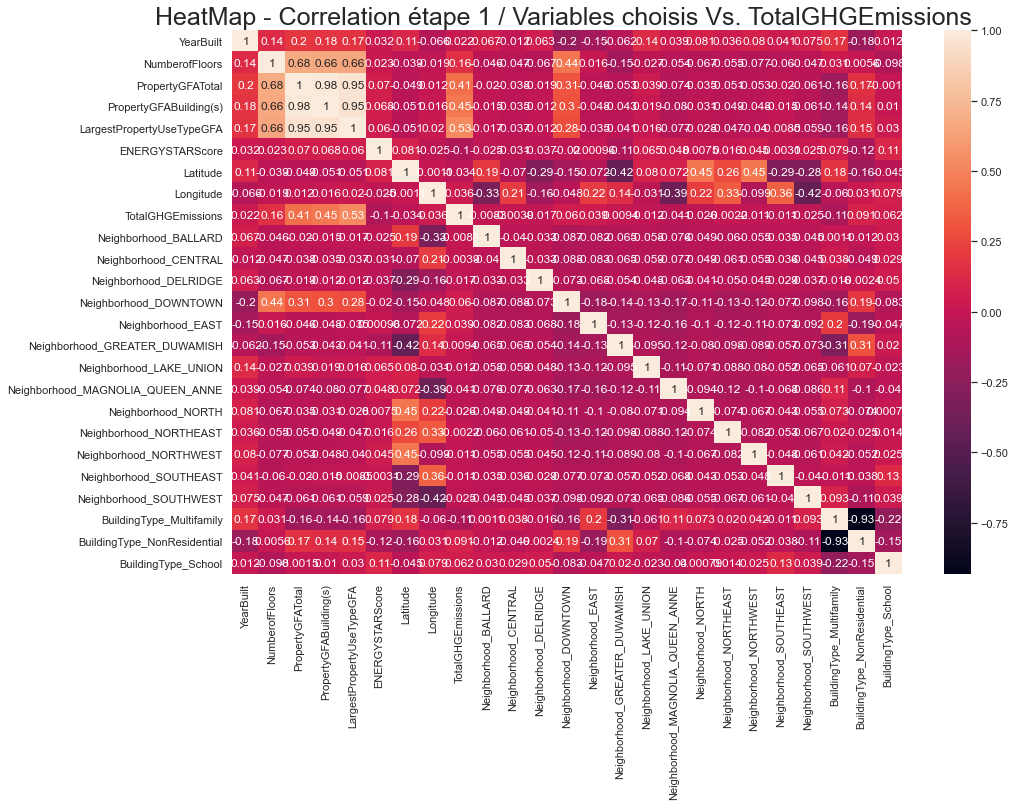

In [5]:

#On garde les variables Fixes
data_04 = data03.dropna()
data_05 = pd.DataFrame(data_04)
corr = data_05.astype('float64').corr()

corr_filter_0 = corr["TotalGHGEmissions"]
corr_filter_0 = corr_filter_0.to_frame().reset_index()
corr_filter_1 = corr_filter_0.sort_values(by=['TotalGHGEmissions'], ascending=False)
corr_filter_2 = corr_filter_1[corr_filter_1.TotalGHGEmissions > 0.40]

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.title("HeatMap - Correlation étape 1 / Variables choisis Vs. TotalGHGEmissions ", fontsize=25)
plt.savefig('C02_1.png')
plt.show()

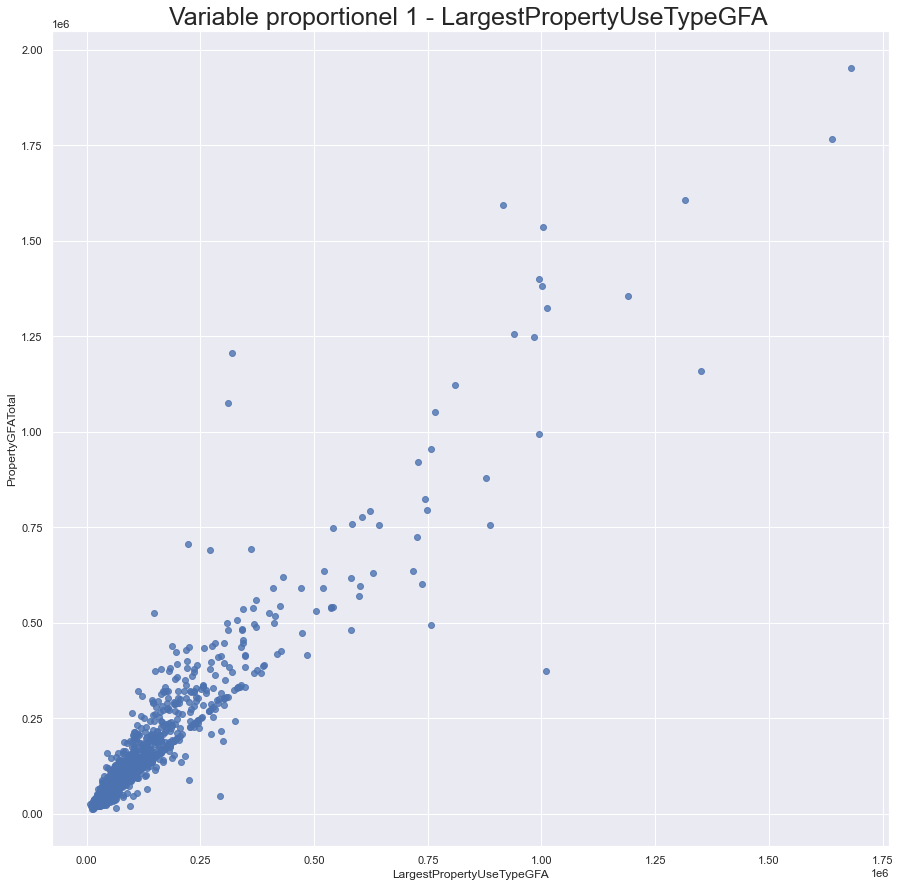

In [6]:
#Verification prop
sns.regplot(x=data_05["LargestPropertyUseTypeGFA"], y=data_05["PropertyGFATotal"], fit_reg=False)
plt.title("Variable proportionel 1 - LargestPropertyUseTypeGFA ", fontsize=25)
plt.savefig('C02_2.png')
plt.show()

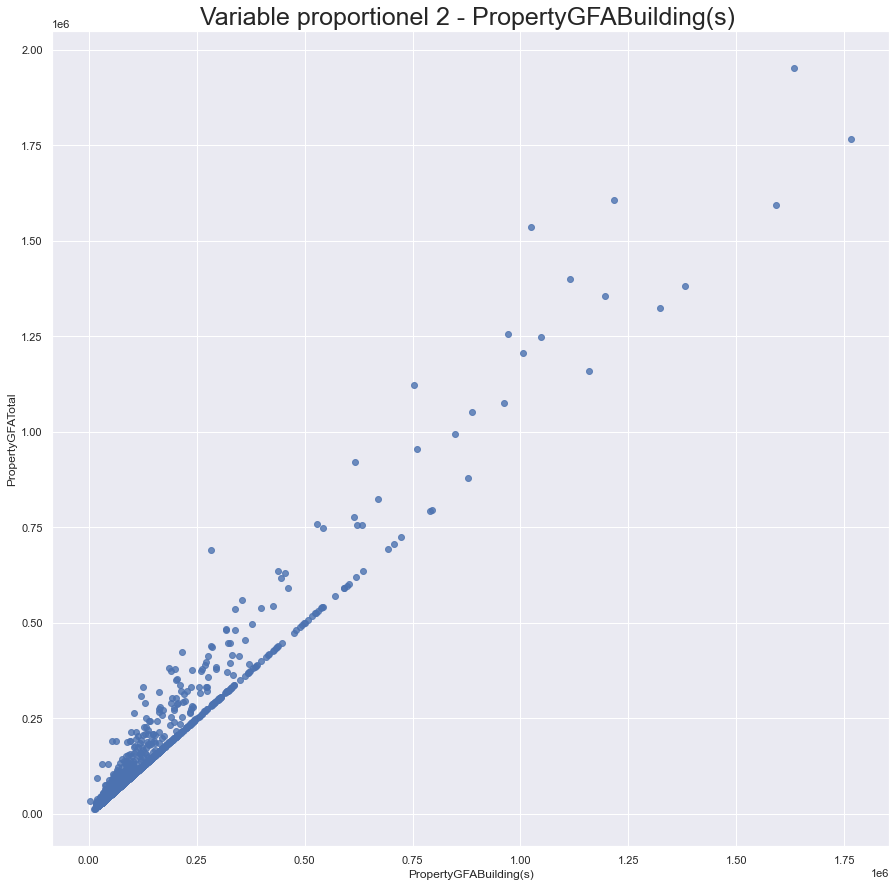

In [7]:
sns.regplot(x=data_05["PropertyGFABuilding(s)"], y=data_05["PropertyGFATotal"], fit_reg=False)
plt.title("Variable proportionel 2 - PropertyGFABuilding(s) ", fontsize=25)
plt.savefig('C02_3.png')
plt.show()

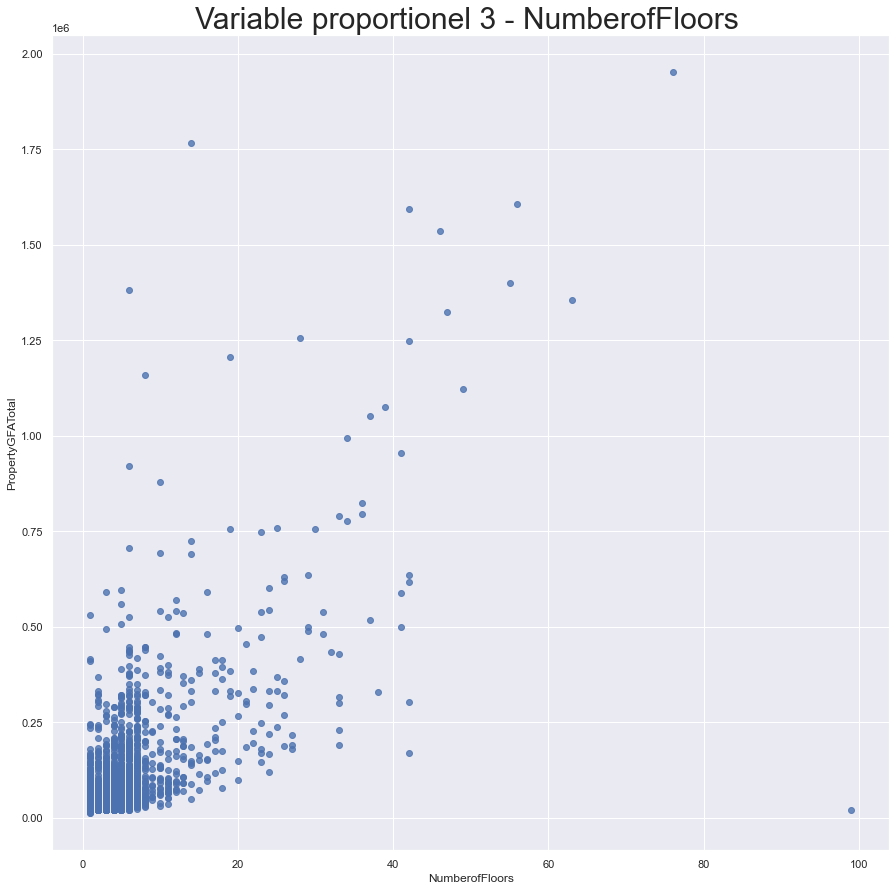

In [8]:
sns.regplot(x=data_05["NumberofFloors"], y=data_05["PropertyGFATotal"], fit_reg=False)
plt.title("Variable proportionel 3 - NumberofFloors ", fontsize=30)
plt.savefig('C02_4.png')
plt.show()

# On supprime les variables proportionnelles

/Users/soso/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


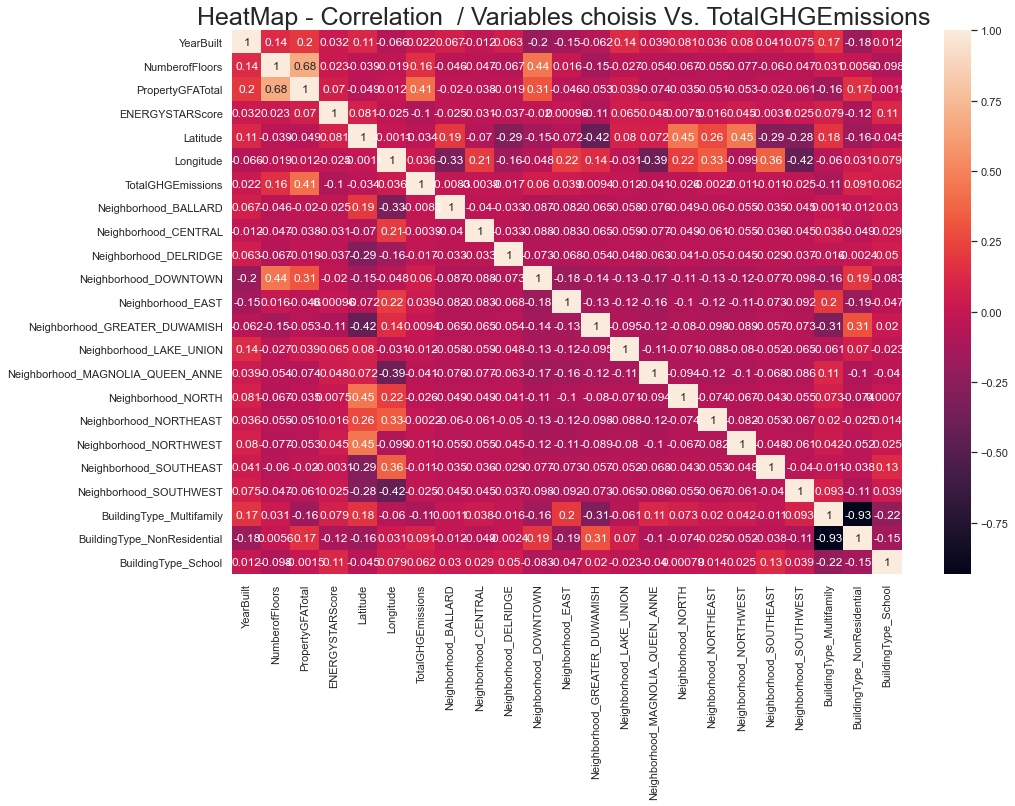

In [9]:



data_04.drop('PropertyGFABuilding(s)', inplace=True, axis=1)
data_04.drop('LargestPropertyUseTypeGFA', inplace=True, axis=1)



new_data = data_04[(data_04[['TotalGHGEmissions','Longitude','Latitude',"ENERGYSTARScore"]] != 0.000000).all(axis=1)]
new_data.astype(int).describe()
#print(new_data)
corr = new_data.astype('float64').corr()

corr_filter_0 = corr["TotalGHGEmissions"]
corr_filter_0 = corr_filter_0.to_frame().reset_index()
corr_filter_1 = corr_filter_0.sort_values(by=['TotalGHGEmissions'], ascending=False)
corr_filter_2 = corr_filter_1[corr_filter_1.TotalGHGEmissions > 0.40]

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.title("HeatMap - Correlation  / Variables choisis Vs. TotalGHGEmissions ", fontsize=25)
plt.savefig('C02_5.png')
plt.show()

# On compare les modeles

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
keepCols = ['YearBuilt', 'NumberofFloors', 'ENERGYSTARScore','PropertyGFATotal',
       'Latitude', 'Longitude', 'Neighborhood_BALLARD', 'TotalGHGEmissions',
       'Neighborhood_CENTRAL', 'Neighborhood_DELRIDGE',
       'Neighborhood_DOWNTOWN', 'Neighborhood_EAST',
       'Neighborhood_GREATER_DUWAMISH', 'Neighborhood_LAKE_UNION',
       'Neighborhood_MAGNOLIA_QUEEN_ANNE', 'Neighborhood_NORTH',
       'Neighborhood_NORTHEAST', 'Neighborhood_NORTHWEST',
       'Neighborhood_SOUTHEAST', 'Neighborhood_SOUTHWEST',
       'BuildingType_Multifamily', 'BuildingType_NonResidential',
       'BuildingType_School']

scaled_df = scaler.fit_transform(new_data[keepCols])
new_data = pd.DataFrame(scaled_df, columns=keepCols)

<ipython-input-11-3046d796766f>:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomforest_fit = randomforest.fit(X_train, y_train)


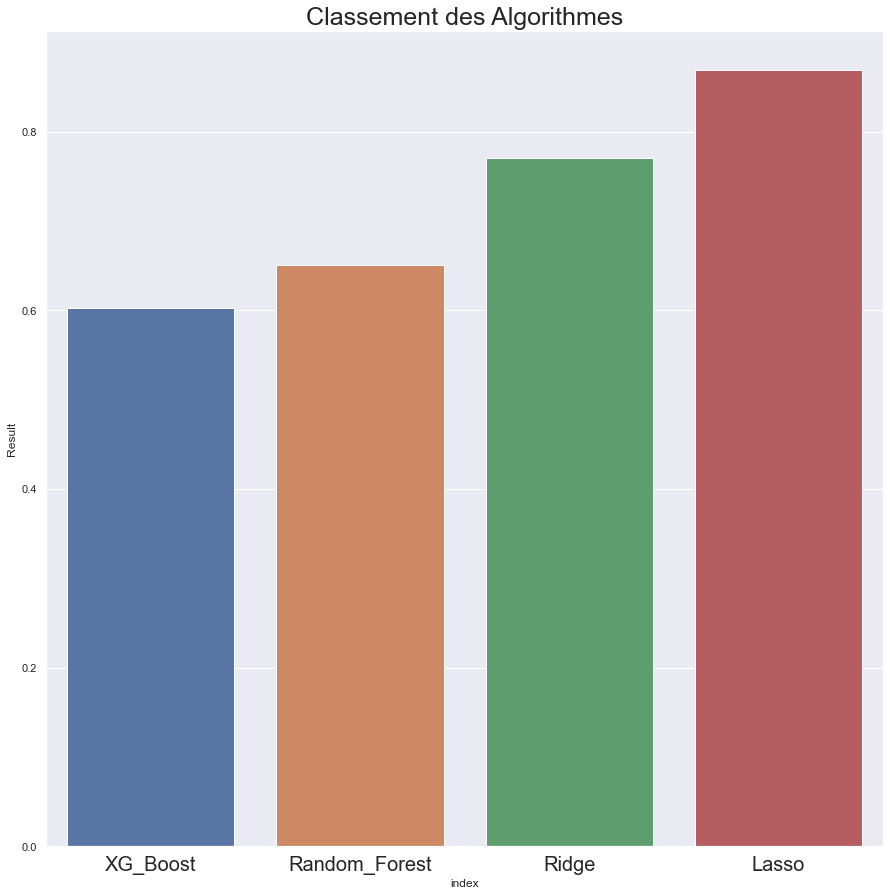

In [11]:
#Import the function
target_column = ['TotalGHGEmissions'] 
predictors =  ['YearBuilt', 'PropertyGFATotal', 'ENERGYSTARScore',
       'Latitude', 'Longitude','Neighborhood_BALLARD',
       'Neighborhood_CENTRAL', 'Neighborhood_DELRIDGE',
       'Neighborhood_DOWNTOWN', 'Neighborhood_EAST',
       'Neighborhood_GREATER_DUWAMISH', 'Neighborhood_LAKE_UNION',
       'Neighborhood_MAGNOLIA_QUEEN_ANNE', 'Neighborhood_NORTH',
       'Neighborhood_NORTHEAST', 'Neighborhood_NORTHWEST',
       'Neighborhood_SOUTHEAST', 'Neighborhood_SOUTHWEST',
       'BuildingType_Multifamily', 'BuildingType_NonResidential',
       'BuildingType_School'] 

X = new_data[predictors].values
y = new_data[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)

ridgeReg = Ridge()
ridgeReg.fit(X_train,y_train)
pred_rid = ridgeReg.predict(X_test)
RMSE_Ridge = np.sqrt(metrics.mean_squared_error(y_test, pred_rid))
R2_Ridge = r2_score(y_test, pred_rid)

regressor = Lasso()
regressor.fit(X_train, y_train)
pred_lin = regressor.predict(X_test)
RMSE_Linear = np.sqrt(metrics.mean_squared_error(y_test, pred_lin))
R2_Linear = r2_score(y_test, pred_lin)

xg_reg = xgb.XGBRegressor()
XG_fit = xg_reg.fit(X_train,y_train)
pred_xg = xg_reg.predict(X_test)
RMSE_XG = np.sqrt(metrics.mean_squared_error(y_test, pred_xg))
R2_XG = r2_score(y_test, pred_xg)

randomforest=RandomForestRegressor(random_state=42)
randomforest_fit = randomforest.fit(X_train, y_train)
pred_rf=randomforest.predict(X_test)
RMSE_RF = np.sqrt(metrics.mean_squared_error(y_test, pred_rf))
R2_RF = r2_score(y_test, pred_rf)


d = {'Result': [RMSE_RF,RMSE_Ridge,RMSE_Linear,RMSE_XG]}

df = pd.DataFrame(data=d)
df1 = df.rename(index={0: "Random_Forest", 1: "Ridge", 2: "Lasso", 3: "XG_Boost"})
df2 = df1.sort_values(by=['Result'])
df3 = df2.reset_index()

ax = sns.barplot(x="index", y="Result", data=df3, ci=68)
plt.title("Classement des Algorithmes", fontsize=25)
plt.savefig('C02_6.png')
plt.xticks(fontsize= 20)







df_xg_0 = RMSE_XG
df_rf_0 =  RMSE_RF


# RANDOM FOREST

# On cherche les varibles les plus importantes

Text(0.5, 1.0, 'Emission CO2 - Feature Importance - Random Forest')

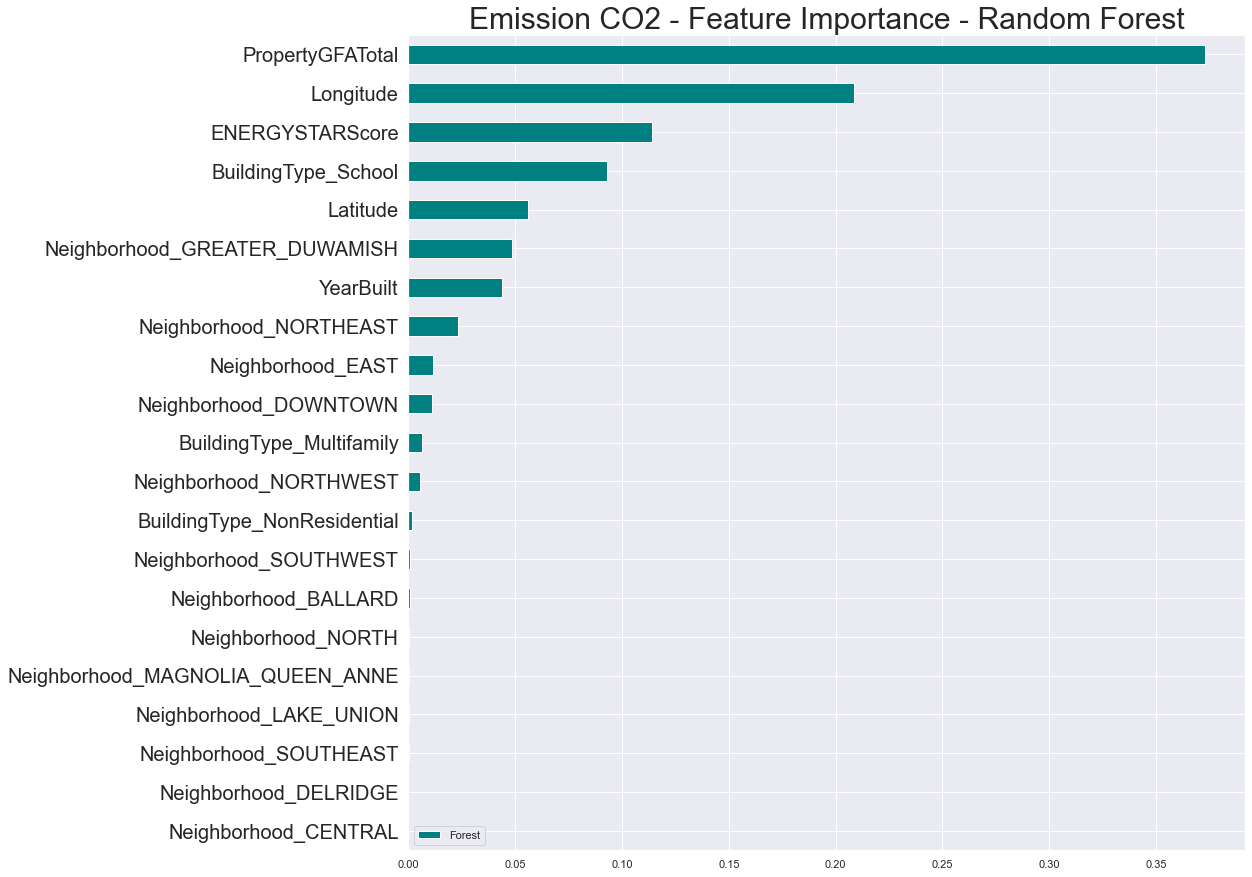

In [12]:
# Graph - Features SANS ENERGy
f = randomforest.feature_importances_
df_rf= pd.DataFrame(data=f, index=[
       'YearBuilt', 'PropertyGFATotal', 'ENERGYSTARScore',
       'Latitude', 'Longitude','Neighborhood_BALLARD',
       'Neighborhood_CENTRAL', 'Neighborhood_DELRIDGE',
       'Neighborhood_DOWNTOWN', 'Neighborhood_EAST',
       'Neighborhood_GREATER_DUWAMISH', 'Neighborhood_LAKE_UNION',
       'Neighborhood_MAGNOLIA_QUEEN_ANNE', 'Neighborhood_NORTH',
       'Neighborhood_NORTHEAST', 'Neighborhood_NORTHWEST',
       'Neighborhood_SOUTHEAST', 'Neighborhood_SOUTHWEST',
       'BuildingType_Multifamily', 'BuildingType_NonResidential',
       'BuildingType_School'
], columns=["Forest"])

# Graph - Features SANS ENERGy
f = randomforest.feature_importances_
df_rf= pd.DataFrame(data=f, index=[
     'YearBuilt', 'PropertyGFATotal', 'ENERGYSTARScore',
       'Latitude', 'Longitude','Neighborhood_BALLARD',
       'Neighborhood_CENTRAL', 'Neighborhood_DELRIDGE',
       'Neighborhood_DOWNTOWN', 'Neighborhood_EAST',
       'Neighborhood_GREATER_DUWAMISH', 'Neighborhood_LAKE_UNION',
       'Neighborhood_MAGNOLIA_QUEEN_ANNE', 'Neighborhood_NORTH',
       'Neighborhood_NORTHEAST', 'Neighborhood_NORTHWEST',
       'Neighborhood_SOUTHEAST', 'Neighborhood_SOUTHWEST',
       'BuildingType_Multifamily', 'BuildingType_NonResidential',
       'BuildingType_School'
]
, columns=["Forest"])
df_rf = df_rf.sort_values(by=['Forest'])
df_rf.plot(kind='barh', color = 'teal')
plt.yticks(fontsize= 20)
plt.savefig('C02_7.png')
plt.title("Emission CO2 - Feature Importance - Random Forest", fontsize=30)

# On cherche les meilleurs HP

In [13]:
#def main():
#    clf = RandomForestRegressor(random_state=42)
#    parameters = {
#        'n_estimators':[1,10, 25, 50],
#        'min_samples_split':[10, 25, 50],
#        'min_samples_leaf':[1,2,3,5,7,10, 25, 50],        
#        'min_weight_fraction_leaf':[0.0, 0.5, 0.9],
#        'min_impurity_decrease':[0.0, 0.5, 0.9],
#        'verbose':[0,1,5]}
#    clf1 = GridSearchCV(clf, parameters, n_jobs=1, cv=2)
#    clf1.fit(X_train, y_train)
#    best_parameters = clf1.best_params_
#    return print('GridSearchCV Results: ',best_parameters)
#
#print('==============feature importances - Apply =======================')               
#print('XGBoost best_params_ ------ XXX --------:',main() ) 
#print('===============================================================')

#GridSearchCV Results:  {'min_impurity_decrease': 0.5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 25, 'verbose': 0}
#XGBoost best_params_ ------ XXX --------: None

# On Test

In [14]:
import warnings
warnings.filterwarnings('ignore')



#Import the function - DE BASE 

pred1 =  [
'Neighborhood_LAKE_UNION'           ,
'Neighborhood_BALLARD'              ,
'Neighborhood_MAGNOLIA_QUEEN_ANNE'  ,
'Neighborhood_NORTH'                ,
'Neighborhood_SOUTHWEST'            ,
'BuildingType_Multifamily'          ,
'BuildingType_NonResidential'       ,
'Neighborhood_NORTHWEST'            ,
'Neighborhood_EAST'                 ,
'Neighborhood_DOWNTOWN'             ,
'Neighborhood_NORTHEAST'            ,
'YearBuilt'                         ,
'Neighborhood_GREATER_DUWAMISH'     ,
'Latitude'                          ,
'BuildingType_School'               ,
'ENERGYSTARScore'                   ,
'Longitude'                         ,
'PropertyGFATotal'                 ] 


pred2 =  [
'Neighborhood_NORTH'                ,
'Neighborhood_SOUTHWEST'            ,
'BuildingType_Multifamily'          ,
'BuildingType_NonResidential'       ,
'Neighborhood_NORTHWEST'            ,
'Neighborhood_EAST'                 ,
'Neighborhood_DOWNTOWN'             ,
'Neighborhood_NORTHEAST'            ,
'YearBuilt'                         ,
'Neighborhood_GREATER_DUWAMISH'     ,
'Latitude'                          ,
'BuildingType_School'               ,
'ENERGYSTARScore'                   ,
'Longitude'                         ,
'PropertyGFATotal'                 ] 


pred3 =  [
'BuildingType_NonResidential'       ,
'Neighborhood_NORTHWEST'            ,
'Neighborhood_EAST'                 ,
'Neighborhood_DOWNTOWN'             ,
'Neighborhood_NORTHEAST'            ,
'YearBuilt'                         ,
'Neighborhood_GREATER_DUWAMISH'     ,
'Latitude'                          ,
'BuildingType_School'               ,
'ENERGYSTARScore'                   ,
'Longitude'                         ,
'PropertyGFATotal'                 
] 

pred4 =  [
'Neighborhood_DOWNTOWN'             ,
'Neighborhood_NORTHEAST'            ,
'YearBuilt'                         ,
'Neighborhood_GREATER_DUWAMISH'     ,
'Latitude'                          ,
'BuildingType_School'               ,
'ENERGYSTARScore'                   ,
'Longitude'                         ,
'PropertyGFATotal'                 
] 

pred5 =  [
'YearBuilt'                         ,
'Neighborhood_GREATER_DUWAMISH'     ,
'Latitude'                          ,
'BuildingType_School'               ,
'ENERGYSTARScore'                   ,
'Longitude'                         ,
'PropertyGFATotal'                 
] 

pred6 =  [
'BuildingType_School'               ,
'ENERGYSTARScore'                   ,
'Longitude'                         ,
'PropertyGFATotal'                 
] 

def featureImp (pred) :
    X = new_data[pred].values
    y = new_data[target_column].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)
    randomforest= RandomForestRegressor(random_state=42)
    randomforest_fit = randomforest.fit(X_train, y_train)
    pred_rf=randomforest.predict(X_test)
    RMSE_RF = np.sqrt(metrics.mean_squared_error(y_test, pred_rf))
    R2_RF = r2_score(y_test, pred_rf)
    return RMSE_RF


def featureImpWFE (pred) :
    X = new_data[pred].values
    y = new_data[target_column].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)
    randomforest= RandomForestRegressor(
        random_state=42,
    min_impurity_decrease= 0.5, 
    min_samples_leaf= 5, 
    min_samples_split= 10, 
    min_weight_fraction_leaf=0.0,
    n_estimators= 25, 
    verbose= 0)
    randomforest_fit = randomforest.fit(X_train, y_train)
    pred_rf=randomforest.predict(X_test)
    RMSE_RF = np.sqrt(metrics.mean_squared_error(y_test, pred_rf))
    R2_RF = r2_score(y_test, pred_rf)
    return RMSE_RF


df_rf = pd.DataFrame(columns=['RMSE_RF', 'CODE'])  

df_rf.loc[0] = [featureImp(pred1), "1.1"] 
df_rf.loc[1] = [featureImp(pred2), "1.2"] 
df_rf.loc[2] = [featureImp(pred3), "1.3"] 
df_rf.loc[3] = [featureImp(pred4), "1.4"] 
df_rf.loc[4] = [featureImp(pred5), "1.5"] 
df_rf.loc[5] = [featureImp(pred6), "1.6"] 

df_rf.loc[6] = [featureImpWFE (pred1), "2.1"] 
df_rf.loc[7] = [featureImpWFE (pred2), "2.2"] 
df_rf.loc[8] = [featureImpWFE (pred3), "2.3"] 
df_rf.loc[9] = [featureImpWFE (pred4), "2.4"] 
df_rf.loc[10] = [featureImpWFE(pred5), "2.5"] 
df_rf.loc[11] = [featureImpWFE(pred6), "2.6"] 
print(df_rf)

df_rf = df_rf.sort_values(by=['RMSE_RF'])
df_rf_1 = df_rf['RMSE_RF'].min()
df_rf_2 = df_rf['RMSE_RF'].mean()
df_rf_3 = df_rf['RMSE_RF'].max()

     RMSE_RF CODE
0   0.653249  1.1
1   0.651056  1.2
2   0.655640  1.3
3   0.664600  1.4
4   0.655260  1.5
5   0.654351  1.6
6   0.839286  2.1
7   0.839286  2.2
8   0.839286  2.3
9   0.839286  2.4
10  0.839286  2.5
11  0.834240  2.6


# XGBoost

# On cherche les meilleurs hyperParametres

In [15]:
#import warnings
#warnings.filterwarnings('ignore')
#
# ByPass car trés Long
#
# HyperParam - Search
#def main():
#    clf = XGBRegressor(
#        eval_metric = 'rmse',
#        nthread = 4,
#        eta = 0.1,
#        num_boost_round = 80,
#        max_depth = 5,
#        subsample = 0.5,
#        colsample_bytree = 1.0,
#        silent = 1,
#        )
#    parameters = {
#        'num_boost_round': [10, 25, 50],
#        'eta': [0.05, 0.1, 0.3],
#        'max_depth': [3, 4, 5],
#        'subsample': [0.9, 1.0],
#        'colsample_bytree': [0.9, 1.0],
#    }
#    
#    clf1 = GridSearchCV(clf, parameters, n_jobs=1, cv=2)
#    
#    clf1.fit(X_train, y_train)
#    
#    best_parameters = clf1.best_params_
#
#    return print('GridSearchCV Results: ',best_parameters)
#
#
#print('==============feature importances - Apply =======================')               
#print('XGBoost best_params_ ------ XXX --------:',main() ) 
#print('===============================================================')
#Audio(sound_file, autoplay=True)
#
#
#GridSearchCV Results:  {'colsample_bytree': 0.9, 'eta': 0.3, 'max_depth': 3, 'num_boost_round': 10, 'subsample': 1.0}

# On cherche les varibles les plus importantes

                                        XG
Neighborhood_SOUTHEAST            0.000000
Neighborhood_CENTRAL              0.000156
Neighborhood_DELRIDGE             0.000569
Neighborhood_MAGNOLIA_QUEEN_ANNE  0.000822
Neighborhood_EAST                 0.000912
Neighborhood_BALLARD              0.001051
Neighborhood_LAKE_UNION           0.001411
Latitude                          0.002573
BuildingType_Multifamily          0.003223
BuildingType_School               0.003635
Neighborhood_NORTH                0.008847
BuildingType_NonResidential       0.009573
YearBuilt                         0.023079
Neighborhood_SOUTHWEST            0.023698
Neighborhood_DOWNTOWN             0.035086
ENERGYSTARScore                   0.040846
Neighborhood_NORTHWEST            0.054876
Neighborhood_NORTHEAST            0.099840
Neighborhood_GREATER_DUWAMISH     0.107961
PropertyGFATotal                  0.116417
Longitude                         0.465427


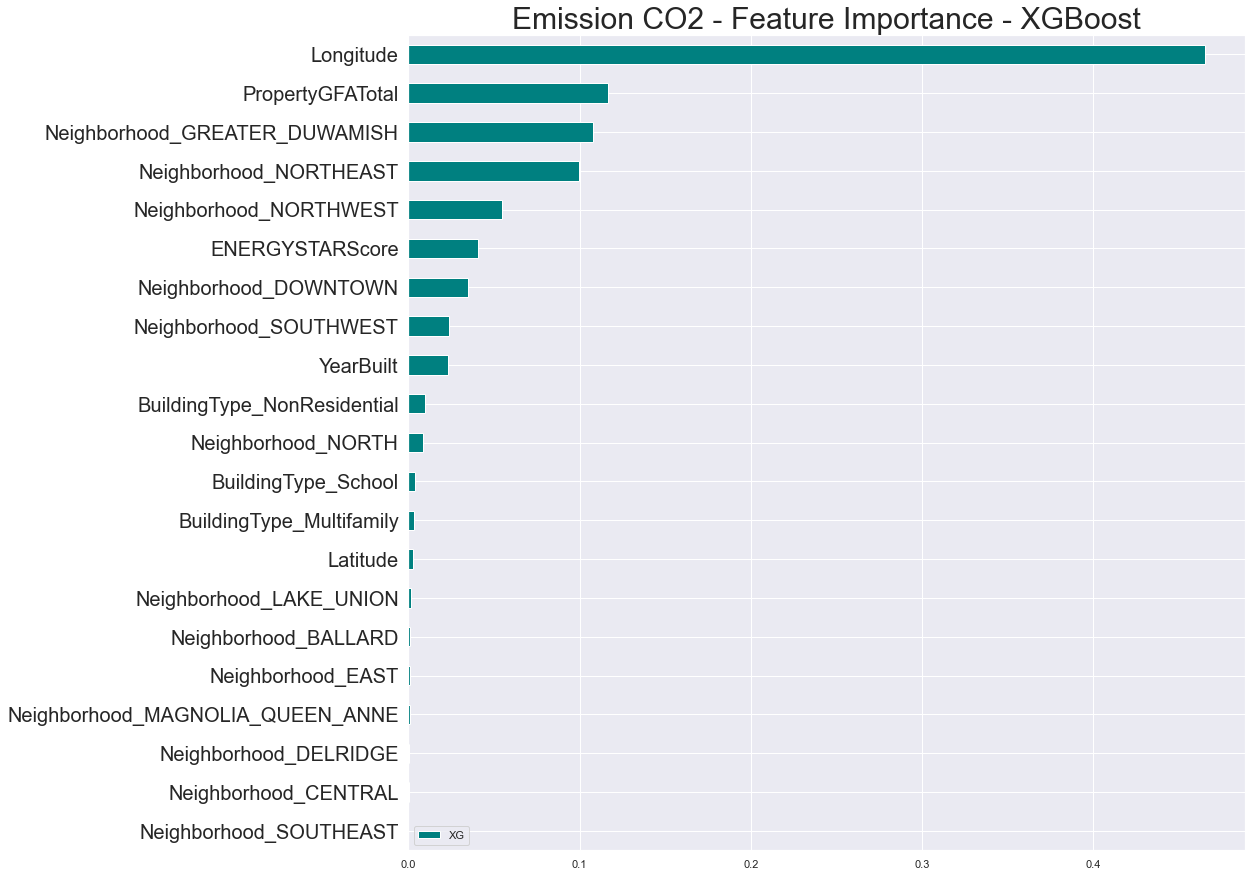

In [16]:
f = xg_reg.feature_importances_
df_xg= pd.DataFrame(data=f, index=[
       'YearBuilt', 'PropertyGFATotal', 'ENERGYSTARScore',
       'Latitude', 'Longitude','Neighborhood_BALLARD',
       'Neighborhood_CENTRAL', 'Neighborhood_DELRIDGE',
       'Neighborhood_DOWNTOWN', 'Neighborhood_EAST',
       'Neighborhood_GREATER_DUWAMISH', 'Neighborhood_LAKE_UNION',
       'Neighborhood_MAGNOLIA_QUEEN_ANNE', 'Neighborhood_NORTH',
       'Neighborhood_NORTHEAST', 'Neighborhood_NORTHWEST',
       'Neighborhood_SOUTHEAST', 'Neighborhood_SOUTHWEST',
       'BuildingType_Multifamily', 'BuildingType_NonResidential',
       'BuildingType_School'
], columns=["XG"])
df_xg = df_xg.sort_values(by=['XG'])
df_xg.plot(kind='barh', color = 'teal')
plt.title("Emission CO2 - Feature Importance - XGBoost", fontsize=30)
plt.yticks(fontsize= 20)
plt.savefig('C02_8.png')
print(df_xg)


## Last Test 
target_column = ['TotalGHGEmissions'] 

predictors_1 =  [
'Neighborhood_CENTRAL',
'Neighborhood_SOUTHEAST',
'Neighborhood_MAGNOLIA_QUEEN_ANNE',
'Neighborhood_BALLARD'              ,
'Neighborhood_LAKE_UNION'           ,
'Neighborhood_EAST'                 ,
'Neighborhood_NORTH'                ,
'Neighborhood_DOWNTOWN'             ,
'Latitude'                          ,
'BuildingType_School'               ,
'Neighborhood_DELRIDGE'             ,
'BuildingType_NonResidential'       ,
'BuildingType_Multifamily'          ,
'YearBuilt'                         ,
'Neighborhood_SOUTHWEST'            ,
'Neighborhood_NORTHEAST'            ,
'ENERGYSTARScore'                   ,
'Neighborhood_NORTHWEST'            ,
'PropertyGFATotal'                  ,
'Longitude'                         ,
'Neighborhood_GREATER_DUWAMISH'     ,
]



predictors_2 =  [
'Neighborhood_BALLARD'              ,
'Neighborhood_LAKE_UNION'           ,
'Neighborhood_EAST'                 ,
'Neighborhood_NORTH'                ,
'Neighborhood_DOWNTOWN'             ,
'Latitude'                          ,
'BuildingType_School'               ,
'Neighborhood_DELRIDGE'             ,
'BuildingType_NonResidential'       ,
'BuildingType_Multifamily'          ,
'YearBuilt'                         ,
'Neighborhood_SOUTHWEST'            ,
'Neighborhood_NORTHEAST'            ,
'ENERGYSTARScore'                   ,
'Neighborhood_NORTHWEST'            ,
'PropertyGFATotal'                  ,
'Longitude'                         ,
'Neighborhood_GREATER_DUWAMISH'     ,
]


predictors_3 =  [
'Neighborhood_NORTH'                ,
'Neighborhood_DOWNTOWN'             ,
'Latitude'                          ,
'BuildingType_School'               ,
'Neighborhood_DELRIDGE'             ,
'BuildingType_NonResidential'       ,
'BuildingType_Multifamily'          ,
'YearBuilt'                         ,
'Neighborhood_SOUTHWEST'            ,
'Neighborhood_NORTHEAST'            ,
'ENERGYSTARScore'                   ,
'Neighborhood_NORTHWEST'            ,
'PropertyGFATotal'                  ,
'Longitude'                         ,
'Neighborhood_GREATER_DUWAMISH'     ,
]





predictors_4 =  [                   
'BuildingType_School'               ,
'Neighborhood_DELRIDGE'             ,
'BuildingType_NonResidential'       ,
'BuildingType_Multifamily'          ,
'YearBuilt'                         ,
'Neighborhood_SOUTHWEST'            ,
'Neighborhood_NORTHEAST'            ,
'ENERGYSTARScore'                   ,
'Neighborhood_NORTHWEST'            ,
'PropertyGFATotal'                  ,
'Longitude'                         ,
'Neighborhood_GREATER_DUWAMISH'     ,
]



predictors_5 =  [
'BuildingType_Multifamily'          ,
'YearBuilt'                         ,
'Neighborhood_SOUTHWEST'            ,
'Neighborhood_NORTHEAST'            ,
'ENERGYSTARScore'                   ,
'Neighborhood_NORTHWEST'            ,
'PropertyGFATotal'                  ,
'Longitude'                         ,
'Neighborhood_GREATER_DUWAMISH'     ,
]



predictors_6 =  [
'Neighborhood_NORTHEAST'            ,
'ENERGYSTARScore'                   ,
'Neighborhood_NORTHWEST'            ,
'PropertyGFATotal'                  ,
'Longitude'                         ,
'Neighborhood_GREATER_DUWAMISH'     
]


predictors_7 =  [
'ENERGYSTARScore'                   ,
'Neighborhood_NORTHWEST'            ,
'PropertyGFATotal'                  ,
'Longitude'                         ,
'Neighborhood_GREATER_DUWAMISH'     
]


predictors_8 =  [           
'Neighborhood_NORTHWEST'            ,
'PropertyGFATotal'                  ,
'Longitude'                         ,
'Neighborhood_GREATER_DUWAMISH'     
]

predictors_9 =  [           
'PropertyGFATotal'                  ,
'Longitude'                         ,
'Neighborhood_GREATER_DUWAMISH'     
]

predictors_10 =  [                      
'Longitude',
'Neighborhood_GREATER_DUWAMISH'     
]

predictors_11 =  [           
'Neighborhood_GREATER_DUWAMISH'     
]



def featureImp (pred) :
    X = new_data[pred].values
    y = new_data[target_column].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)
    xgbregressor= XGBRegressor()
    xgbregressor_fit = xgbregressor.fit(X_train, y_train)
    pred_XG=xgbregressor.predict(X_test)
    MSE = mean_squared_error(y_test,pred_XG)
    return MSE


def featureImpWFE (pred) :
    X = new_data[pred].values
    y = new_data[target_column].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)
    xgbregressor= XGBRegressor(colsample_bytree= 0.9, eta= 0.3, max_depth= 3, num_boost_round=10, subsample= 1.0)
    xgbregressor_fit = xgbregressor.fit(X_train, y_train)
    pred_XG=xgbregressor.predict(X_test)
    MSE = mean_squared_error(y_test,pred_XG)
    return MSE

featureImp(predictors_1)
featureImp(predictors_2)
featureImp(predictors_3)
featureImp(predictors_4)
featureImp(predictors_5)
featureImp(predictors_6)
featureImp(predictors_7)
featureImp(predictors_8)
featureImp(predictors_9)


df_XG = pd.DataFrame(columns=['RMSE_XG', 'CODE'])  

df_XG.loc[0] = [featureImp(predictors_1), "1.1"] 
df_XG.loc[1] = [featureImp(predictors_2), "1.2"] 
df_XG.loc[2] = [featureImp(predictors_3), "1.3"] 
df_XG.loc[3] = [featureImp(predictors_4), "1.4"] 
df_XG.loc[4] = [featureImp(predictors_5), "1.5"] 
df_XG.loc[5] = [featureImp(predictors_6), "1.6"]
df_XG.loc[6] = [featureImp(predictors_7), "1.7"]
df_XG.loc[7] = [featureImp(predictors_8), "1.8"]
df_XG.loc[8] = [featureImp(predictors_9), "1.9"]
df_XG.loc[9] = [featureImp(predictors_10),"1.10"]
df_XG.loc[10] = [featureImp(predictors_11),"1.11"]

df_XG.loc[11] = [featureImpWFE(predictors_1), "2.1"] 
df_XG.loc[12] = [featureImpWFE(predictors_2), "2.2"]  
df_XG.loc[13] = [featureImpWFE(predictors_3), "2.3"]  
df_XG.loc[14] = [featureImpWFE(predictors_4), "2.4"]  
df_XG.loc[15]= [featureImpWFE(predictors_5), "2.5"] 
df_XG.loc[16]= [featureImpWFE(predictors_6), "2.6"] 
df_XG.loc[17] = [featureImpWFE(predictors_7), "2.7"] 
df_XG.loc[18] = [featureImpWFE(predictors_8), "2.8"]  
df_XG.loc[19] = [featureImpWFE(predictors_9), "2.9"]  
df_XG.loc[21] = [featureImpWFE(predictors_10), "2.10"]  
df_XG.loc[22]= [featureImpWFE(predictors_11), "2.11"] 

df_XG = df_XG.sort_values(by=['RMSE_XG'])

print(df_XG)
#df_xg_1 = df_XG['RMSE_XG'].min()
#df_xg_2 = df_XG['RMSE_XG'].mean()
#df_xg_3 = df_XG['RMSE_XG'].max()

## Last Test 
target_column = ['TotalGHGEmissions'] 

predictors_1 =  [
'Neighborhood_CENTRAL',
'Neighborhood_SOUTHEAST',
'Neighborhood_MAGNOLIA_QUEEN_ANNE',
'Neighborhood_BALLARD'              ,
'Neighborhood_LAKE_UNION'           ,
'Neighborhood_EAST'                 ,
'Neighborhood_NORTH'                ,
'Neighborhood_DOWNTOWN'             ,
'Latitude'                          ,
'BuildingType_School'               ,
'Neighborhood_DELRIDGE'             ,
'BuildingType_NonResidential'       ,
'BuildingType_Multifamily'          ,
'YearBuilt'                         ,
'Neighborhood_SOUTHWEST'            ,
'Neighborhood_NORTHEAST'            ,
'ENERGYSTARScore'                   ,
'Neighborhood_NORTHWEST'            ,
'PropertyGFATotal'                  ,
'Longitude'                         ,
'Neighborhood_GREATER_DUWAMISH'     ,
]



predictors_2 =  [
'Neighborhood_BALLARD'              ,
'Neighborhood_LAKE_UNION'           ,
'Neighborhood_EAST'                 ,
'Neighborhood_NORTH'                ,
'Neighborhood_DOWNTOWN'             ,
'Latitude'                          ,
'BuildingType_School'               ,
'Neighborhood_DELRIDGE'             ,
'BuildingType_NonResidential'       ,
'BuildingType_Multifamily'          ,
'YearBuilt'                         ,
'Neighborhood_SOUTHWEST'            ,
'Neighborhood_NORTHEAST'            ,
'ENERGYSTARScore'                   ,
'Neighborhood_NORTHWEST'            ,
'PropertyGFATotal'                  ,
'Longitude'                         ,
'Neighborhood_GREATER_DUWAMISH'     ,
]


predictors_3 =  [
'Neighborhood_NORTH'                ,
'Neighborhood_DOWNTOWN'             ,
'Latitude'                          ,
'BuildingType_School'               ,
'Neighborhood_DELRIDGE'             ,
'BuildingType_NonResidential'       ,
'BuildingType_Multifamily'          ,
'YearBuilt'                         ,
'Neighborhood_SOUTHWEST'            ,
'Neighborhood_NORTHEAST'            ,
'ENERGYSTARScore'                   ,
'Neighborhood_NORTHWEST'            ,
'PropertyGFATotal'                  ,
'Longitude'                         ,
'Neighborhood_GREATER_DUWAMISH'     ,
]





predictors_4 =  [                   
'BuildingType_School'               ,
'Neighborhood_DELRIDGE'             ,
'BuildingType_NonResidential'       ,
'BuildingType_Multifamily'          ,
'YearBuilt'                         ,
'Neighborhood_SOUTHWEST'            ,
'Neighborhood_NORTHEAST'            ,
'ENERGYSTARScore'                   ,
'Neighborhood_NORTHWEST'            ,
'PropertyGFATotal'                  ,
'Longitude'                         ,
'Neighborhood_GREATER_DUWAMISH'     ,
]



predictors_5 =  [
'BuildingType_Multifamily'          ,
'YearBuilt'                         ,
'Neighborhood_SOUTHWEST'            ,
'Neighborhood_NORTHEAST'            ,
'ENERGYSTARScore'                   ,
'Neighborhood_NORTHWEST'            ,
'PropertyGFATotal'                  ,
'Longitude'                         ,
'Neighborhood_GREATER_DUWAMISH'     ,
]



predictors_6 =  [
'Neighborhood_NORTHEAST'            ,
'ENERGYSTARScore'                   ,
'Neighborhood_NORTHWEST'            ,
'PropertyGFATotal'                  ,
'Longitude'                         ,
'Neighborhood_GREATER_DUWAMISH'     
]


predictors_7 =  [
'ENERGYSTARScore'                   ,
'Neighborhood_NORTHWEST'            ,
'PropertyGFATotal'                  ,
'Longitude'                         ,
'Neighborhood_GREATER_DUWAMISH'     
]


predictors_8 =  [           
'Neighborhood_NORTHWEST'            ,
'PropertyGFATotal'                  ,
'Longitude'                         ,
'Neighborhood_GREATER_DUWAMISH'     
]

predictors_9 =  [           
'PropertyGFATotal'                  ,
'Longitude'                         ,
'Neighborhood_GREATER_DUWAMISH'     
]

predictors_10 =  [                      
'Longitude',
'Neighborhood_GREATER_DUWAMISH'     
]

predictors_11 =  [           
'Neighborhood_GREATER_DUWAMISH'     
]



def featureImp (pred) :
    X = new_data[pred].values
    y = new_data[target_column].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)
    xgbregressor= XGBRegressor()
    xgbregressor_fit = xgbregressor.fit(X_train, y_train)
    pred_XG=xgbregressor.predict(X_test)
    R2_XG = r2_score(y_test, pred_XG)
    return R2_XG


def featureImpWFE (pred) :
    X = new_data[pred].values
    y = new_data[target_column].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)
    xgbregressor= XGBRegressor(colsample_bytree= 0.9, eta= 0.3, max_depth= 3, num_boost_round=10, subsample= 1.0)
    xgbregressor_fit = xgbregressor.fit(X_train, y_train)
    pred_XG=xgbregressor.predict(X_test)
    R2_XG = r2_score(y_test, pred_XG)
    return R2_XG

featureImp(predictors_1)
featureImp(predictors_2)
featureImp(predictors_3)
featureImp(predictors_4)
featureImp(predictors_5)
featureImp(predictors_6)
featureImp(predictors_7)
featureImp(predictors_8)
featureImp(predictors_9)


df_XG = pd.DataFrame(columns=['RMSE_XG', 'CODE'])  

df_XG.loc[0] = [featureImp(predictors_1), "1.1"] 
df_XG.loc[1] = [featureImp(predictors_2), "1.2"] 
df_XG.loc[2] = [featureImp(predictors_3), "1.3"] 
df_XG.loc[3] = [featureImp(predictors_4), "1.4"] 
df_XG.loc[4] = [featureImp(predictors_5), "1.5"] 
df_XG.loc[5] = [featureImp(predictors_6), "1.6"]
df_XG.loc[6] = [featureImp(predictors_7), "1.7"]
df_XG.loc[7] = [featureImp(predictors_8), "1.8"]
df_XG.loc[8] = [featureImp(predictors_9), "1.9"]
df_XG.loc[9] = [featureImp(predictors_10),"1.10"]
df_XG.loc[10] = [featureImp(predictors_11),"1.11"]

df_XG.loc[11] = [featureImpWFE(predictors_1), "2.1"] 
df_XG.loc[12] = [featureImpWFE(predictors_2), "2.2"]  
df_XG.loc[13] = [featureImpWFE(predictors_3), "2.3"]  
df_XG.loc[14] = [featureImpWFE(predictors_4), "2.4"]  
df_XG.loc[15]= [featureImpWFE(predictors_5), "2.5"] 
df_XG.loc[16]= [featureImpWFE(predictors_6), "2.6"] 
df_XG.loc[17] = [featureImpWFE(predictors_7), "2.7"] 
df_XG.loc[18] = [featureImpWFE(predictors_8), "2.8"]  
df_XG.loc[19] = [featureImpWFE(predictors_9), "2.9"]  
df_XG.loc[21] = [featureImpWFE(predictors_10), "2.10"]  
df_XG.loc[22]= [featureImpWFE(predictors_11), "2.11"] 

df_XG = df_XG.sort_values(by=['RMSE_XG'])

print(df_XG)
#<df_xg_1 = df_XG['RMSE_XG'].min()
#<df_xg_2 = df_XG['RMSE_XG'].mean()
#<df_xg_3 = df_XG['RMSE_XG'].max()

In [17]:
## Last Test 
target_column = ['TotalGHGEmissions'] 

predictors_xg_1 =  ["Neighborhood_SOUTHEAST"        ,
"Neighborhood_CENTRAL"              ,
"Neighborhood_DELRIDGE"             ,
"Neighborhood_MAGNOLIA_QUEEN_ANNE"  ,
"Neighborhood_EAST"                 ,
"Neighborhood_BALLARD"              ,
"Neighborhood_LAKE_UNION"           ,
"Latitude"                          ,
"BuildingType_Multifamily"         ,
"BuildingType_School"               ,
"Neighborhood_NORTH"                ,
"BuildingType_NonResidential"       ,
"YearBuilt"                        ,
"Neighborhood_SOUTHWEST"            ,
"Neighborhood_DOWNTOWN"             ,
"ENERGYSTARScore"                   ,
"Neighborhood_NORTHWEST"            ,
"Neighborhood_NORTHEAST"            ,
"Neighborhood_GREATER_DUWAMISH"     ,
"PropertyGFATotal",
"Longitude"         ]     


predictors_xg_2 =  [
"Neighborhood_MAGNOLIA_QUEEN_ANNE"  ,
"Neighborhood_EAST"                 ,
"Neighborhood_BALLARD"              ,
"Neighborhood_LAKE_UNION"           ,
"Latitude"                          ,
"BuildingType_Multifamily"         ,
"BuildingType_School"               ,
"Neighborhood_NORTH"                ,
"BuildingType_NonResidential"       ,
"YearBuilt"                        ,
"Neighborhood_SOUTHWEST"            ,
"Neighborhood_DOWNTOWN"             ,
"ENERGYSTARScore"                   ,
"Neighborhood_NORTHWEST"            ,
"Neighborhood_NORTHEAST"            ,
"Neighborhood_GREATER_DUWAMISH"     ,
"PropertyGFATotal",
"Longitude"         ]   




predictors_xg_3 =  [
"Neighborhood_LAKE_UNION"           ,
"Latitude"                          ,
"BuildingType_Multifamily"         ,
"BuildingType_School"               ,
"Neighborhood_NORTH"                ,
"BuildingType_NonResidential"       ,
"YearBuilt"                        ,
"Neighborhood_SOUTHWEST"            ,
"Neighborhood_DOWNTOWN"             ,
"ENERGYSTARScore"                   ,
"Neighborhood_NORTHWEST"            ,
"Neighborhood_NORTHEAST"            ,
"Neighborhood_GREATER_DUWAMISH"     ,
"PropertyGFATotal",
"Longitude"         ]     



predictors_xg_4 =  [
"BuildingType_School"               ,
"Neighborhood_NORTH"                ,
"BuildingType_NonResidential"       ,
"YearBuilt"                        ,
"Neighborhood_SOUTHWEST"            ,
"Neighborhood_DOWNTOWN"             ,
"ENERGYSTARScore"                   ,
"Neighborhood_NORTHWEST"            ,
"Neighborhood_NORTHEAST"            ,
"Neighborhood_GREATER_DUWAMISH"     ,
"PropertyGFATotal",
"Longitude"         ]                  


predictors_xg_5 =  [
"YearBuilt"                        ,
"Neighborhood_SOUTHWEST"            ,
"Neighborhood_DOWNTOWN"             ,
"ENERGYSTARScore"                   ,
"Neighborhood_NORTHWEST"            ,
"Neighborhood_NORTHEAST"            ,
"Neighborhood_GREATER_DUWAMISH"     ,
"PropertyGFATotal",
"Longitude"         ]     

predictors_xg_6 =  [
"Neighborhood_DOWNTOWN"             ,
"ENERGYSTARScore"                   ,
"Neighborhood_NORTHWEST"            ,
"Neighborhood_NORTHEAST"            ,
"Neighborhood_GREATER_DUWAMISH"     ,
"PropertyGFATotal",
"Longitude"         ]  


predictors_xg_7 =  [
"ENERGYSTARScore"                   ,
"Neighborhood_NORTHWEST"            ,
"Neighborhood_NORTHEAST"            ,
"Neighborhood_GREATER_DUWAMISH"     ,
"PropertyGFATotal",
"Longitude"         ]


predictors_xg_8 =  [
"Neighborhood_NORTHWEST"            ,
"Neighborhood_NORTHEAST"            ,
"Neighborhood_GREATER_DUWAMISH",
"PropertyGFATotal",
"Longitude"         ]     

predictors_xg_9 =  [
"Neighborhood_NORTHEAST",
"Neighborhood_GREATER_DUWAMISH",
"PropertyGFATotal"     ,             
"Longitude"         ]     


predictors_xg_10 =  [
"Neighborhood_GREATER_DUWAMISH",
"PropertyGFATotal",         
"Longitude"         ]    


predictors_xg_11 =  [
"PropertyGFATotal",            
"Longitude"         ]       

def featureImp (pred) :
    X = new_data[pred].values
    y = new_data[target_column].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)
    randomforest= XGBRegressor()
    randomforest_fit = randomforest.fit(X_train, y_train)
    pred_rf=randomforest.predict(X_test)
    RMSE_RF = np.sqrt(metrics.mean_squared_error(y_test, pred_rf))
    R2_RF = r2_score(y_test, pred_rf)
    return RMSE_RF


def featureImpWFE (pred) :
    X = new_data[pred].values
    y = new_data[target_column].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)
    randomforest= XGBRegressor(colsample_bytree= 0.9, eta= 0.3, max_depth= 3, num_boost_round=10, subsample= 1.0)
    randomforest_fit = randomforest.fit(X_train, y_train)
    pred_rf=randomforest.predict(X_test)
    RMSE_RF = np.sqrt(metrics.mean_squared_error(y_test, pred_rf))
    R2_RF = r2_score(y_test, pred_rf)
    return RMSE_RF


df_XG = pd.DataFrame(columns=['RMSE_XG', 'CODE'])  

df_XG.loc[0] = [featureImp(predictors_xg_1), "1.1"] 
df_XG.loc[1] = [featureImp(predictors_xg_2), "1.2"] 
df_XG.loc[2] = [featureImp(predictors_xg_3), "1.3"] 
df_XG.loc[3] = [featureImp(predictors_xg_4), "1.4"] 
df_XG.loc[4] = [featureImp(predictors_xg_5), "1.5"] 
df_XG.loc[5] = [featureImp(predictors_xg_6), "1.6"]
df_XG.loc[6] = [featureImp(predictors_xg_7), "1.7"]
df_XG.loc[7] = [featureImp(predictors_xg_8), "1.8"]
df_XG.loc[8] = [featureImp(predictors_xg_9), "1.9"]
df_XG.loc[9] = [featureImp(predictors_xg_10),"1.10"]
df_XG.loc[10] = [featureImp(predictors_xg_11),"1.11"]

df_XG.loc[11] = [featureImpWFE(predictors_xg_1), "2.1"] 
df_XG.loc[12] = [featureImpWFE(predictors_xg_2), "2.2"]  
df_XG.loc[13] = [featureImpWFE(predictors_xg_3), "2.3"]  
df_XG.loc[14] = [featureImpWFE(predictors_xg_4), "2.4"]  
df_XG.loc[15]= [featureImpWFE(predictors_xg_5), "2.5"] 
df_XG.loc[16]= [featureImpWFE(predictors_xg_6), "2.6"] 
df_XG.loc[17] = [featureImpWFE(predictors_xg_7), "2.7"] 
df_XG.loc[18] = [featureImpWFE(predictors_xg_8), "2.8"]  
df_XG.loc[19] = [featureImpWFE(predictors_xg_9), "2.9"]  
df_XG.loc[21] = [featureImpWFE(predictors_xg_10), "2.10"]  
df_XG.loc[22]= [featureImpWFE(predictors_xg_11), "2.11"] 


df_XG = df_XG.sort_values(by=['RMSE_XG'])

print(df_XG)
df_xg_1 = df_XG['RMSE_XG'].min()
df_xg_2 = df_XG['RMSE_XG'].mean()
df_xg_3 = df_XG['RMSE_XG'].max()

[20:48:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:48:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:48:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are onl

0.6032180147886507 ------ 0.8858941339655616 ------ 0.5808306851673711 ------ 0.5808306851673711 ------
0.6508806522924981 ------ 0.839286124271101 ------ 0.7470688764842625 ------ 0.6510558439080028 ------
                     Etape   RMSE_RF                   Etape_   RMSE_XG
0  Etape 1 - Score de base  0.650881  Etape 1 - Score de base  0.603218
1      Etape 1 - Score Min  0.839286      Etape 2 - Score Min  0.885894
2    Etape 2 - Score Moyen  0.747069    Etape 3 - Score Moyen  0.580831
3      Etape 3 - Score Max  0.651056      Etape 4 - Score Max  0.580831


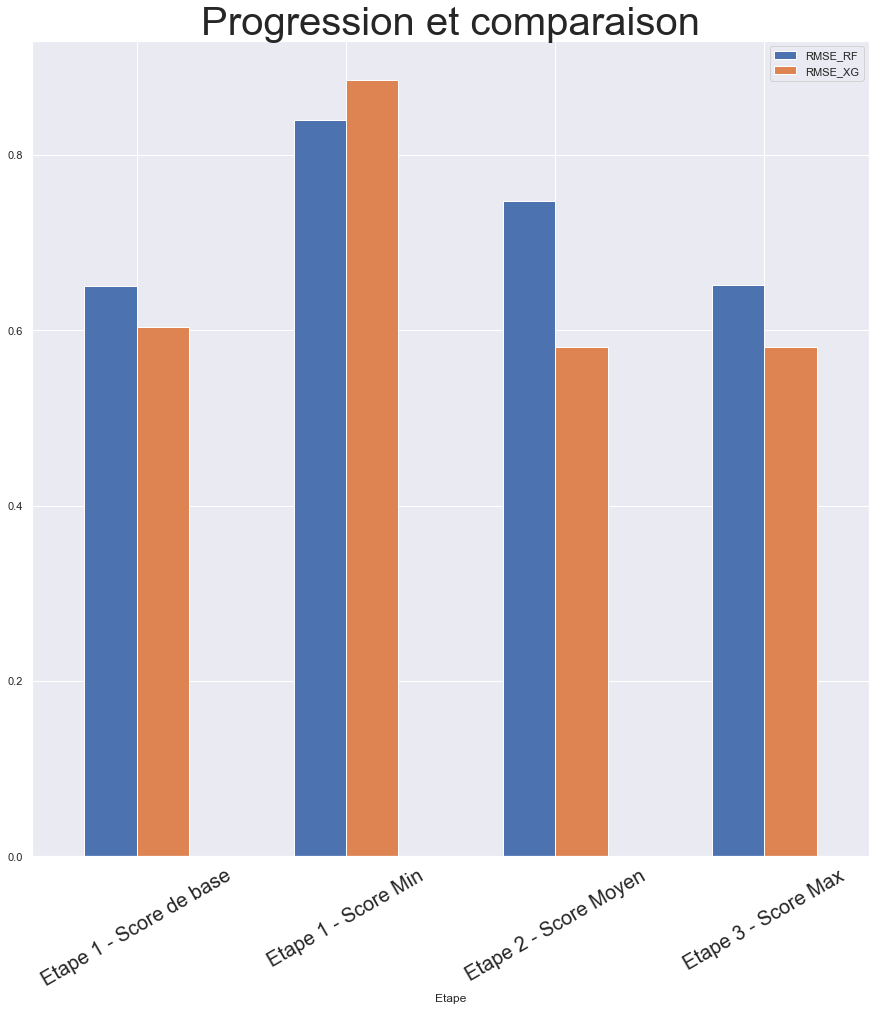

In [18]:
print(df_xg_0 , "------",df_xg_3 , "------",df_xg_2 , "------",df_xg_2 , "------")

data_xg = [ ['Etape 1 - Score de base', df_xg_0], 
        ['Etape 2 - Score Min', df_xg_3], 
        ['Etape 3 - Score Moyen', df_xg_2], 
        ['Etape 4 - Score Max', df_xg_2]]
df_xg = pd.DataFrame(data_xg, columns = ['Etape_', 'RMSE_XG'])

print(df_rf_0 , "------",df_rf_3 , "------",df_rf_2 , "------",df_rf_1 , "------")

data = [['Etape 1 - Score de base', df_rf_0], 
        ['Etape 1 - Score Min', df_rf_3], 
        ['Etape 2 - Score Moyen', df_rf_2], 
        ['Etape 3 - Score Max', df_rf_1]]
df_rf = pd.DataFrame(data, columns = ['Etape', "RMSE_RF"])

result = pd.concat([df_rf, df_xg], axis=1)


print(result)
result.plot(x="Etape", y=["RMSE_RF","" "RMSE_XG"], kind="bar")
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Progression et comparaison", fontsize=40)
plt.xticks(fontsize= 20)
plt.savefig('C02_9.png')

[20:48:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


////////////////////////////////////////////////////////////////


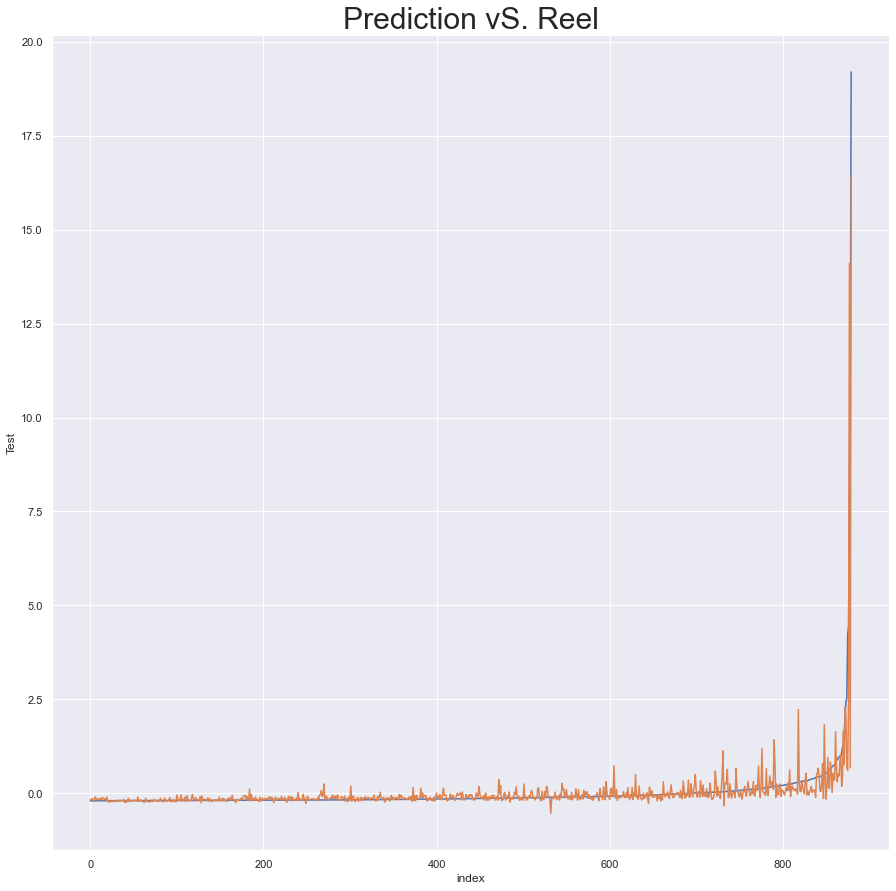

In [19]:
target_column = ['TotalGHGEmissions'] 
X = new_data[predictors_xg_4].values
y = new_data[target_column].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10)
xgbregressor= XGBRegressor(colsample_bytree= 0.9, eta= 0.3, max_depth= 3, num_boost_round=10, subsample= 1.0)
xgbregressor_fit = xgbregressor.fit(X_train, y_train)
pred_XG=xgbregressor.predict(X_test)


# Visualising the results
print("////////////////////////////////////////////////////////////////")
a03 = pd.DataFrame(y_test)
a03 = a03.rename(columns={0: 'Test'})
b03 = pd.DataFrame(pred_XG)
b03 = b03.rename(columns={0: 'Pred'})
c03= pd.concat([a03, b03], axis=1)
c03.head(30)
dat01 = c03.sort_values(by=['Test'], ascending=True)
a = dat01.reset_index()
b = a.rename(columns={'index': "xxx"})
c = b.reset_index()
c.drop('xxx', inplace=True, axis=1)
import seaborn as sns

fmri = sns.load_dataset("fmri")

sns.lineplot(x="index", y="Test",data=c)
sns.lineplot(x="index", y="Pred",data=c)
plt.title("Prediction vS. Reel",fontsize=30)
plt.savefig('C02_10.png')


384.6164374408699
330.51421842075973
273.6079179646864
364.954502106636
338.42769784702847
313.73578924191844

# SANS ENERGY SCORE

[20:50:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:50:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:50:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are onl

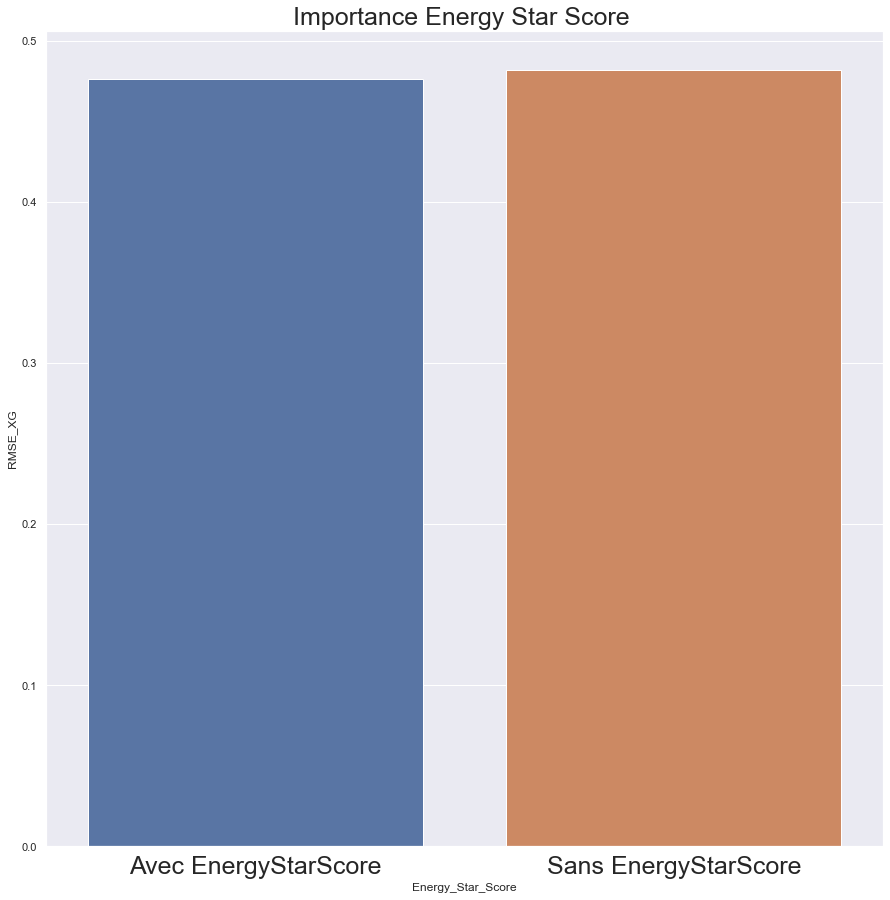

In [22]:
#Import the function

predictors_xg_4_avec =  [
"BuildingType_School"               ,
"Neighborhood_NORTH"                ,
"BuildingType_NonResidential"       ,
"YearBuilt"                        ,
"Neighborhood_SOUTHWEST"            ,
"Neighborhood_DOWNTOWN"             ,
"ENERGYSTARScore"                   ,
"Neighborhood_NORTHWEST"            ,
"Neighborhood_NORTHEAST"            ,
"Neighborhood_GREATER_DUWAMISH"     ,
"PropertyGFATotal",
"Longitude"         ]


predictors_xg_4_sans =  [
"BuildingType_School"               ,
"Neighborhood_NORTH"                ,
"BuildingType_NonResidential"       ,
"YearBuilt"                        ,
"Neighborhood_SOUTHWEST"            ,
"Neighborhood_DOWNTOWN"             ,                  
"Neighborhood_NORTHWEST"            ,
"Neighborhood_NORTHEAST"            ,
"Neighborhood_GREATER_DUWAMISH"     ,
"PropertyGFATotal",
"Longitude"         ]



df_XG_With = [featureImpWFE(predictors_xg_4_avec)]
df_XG_WithOut = [featureImpWFE(predictors_xg_4_sans)]

data_f = [['Avec EnergyStarScore', featureImpWFE(predictors_xg_4_avec)], 
        ['Sans EnergyStarScore', featureImpWFE(predictors_xg_4_sans)]]
df_f = pd.DataFrame(data_f, columns = ['Energy_Star_Score', "RMSE_XG"])
print(df_f)

ax = sns.barplot(x="Energy_Star_Score", y="RMSE_XG", data=df_f, ci=68)
plt.title("Importance Energy Star Score ", fontsize=25)
plt.xticks(fontsize= 25)
plt.savefig('elec_11.png')